/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


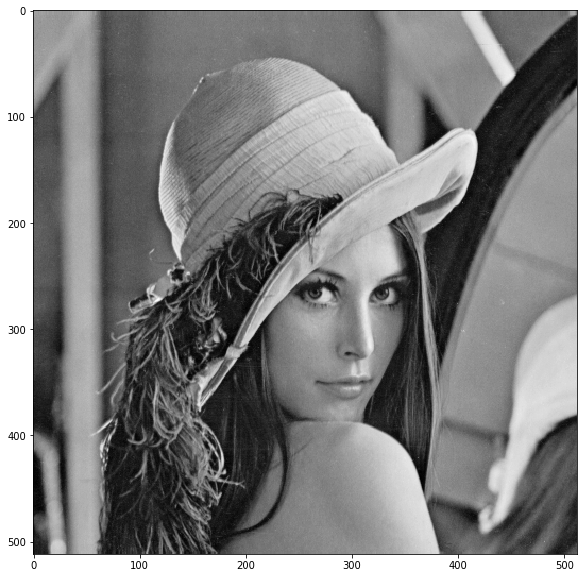

In [50]:
import scipy
from scipy import misc
l = scipy.misc.imread('lena.png')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(l,cmap='gray')
plt.show()

In [51]:
from scipy import misc
lena = misc.imread('lena.png')
type(lena)
 
lena.shape, lena.dtype

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


((512, 512), dtype('uint8'))

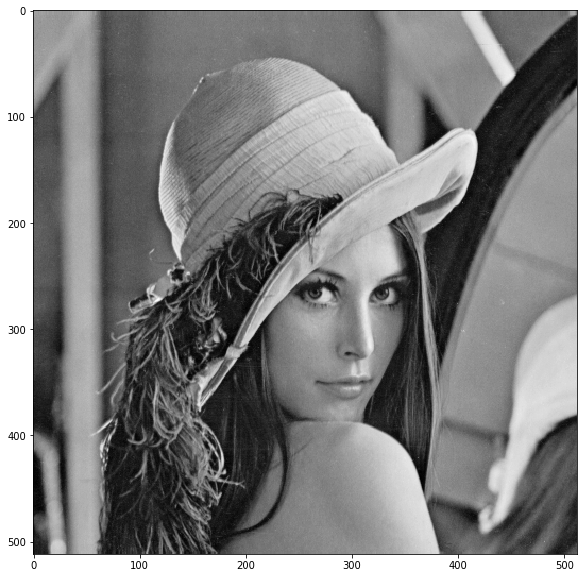

In [52]:
plt.imshow(l, cmap=plt.cm.gray)

(-0.5, 511.5, 511.5, -0.5)

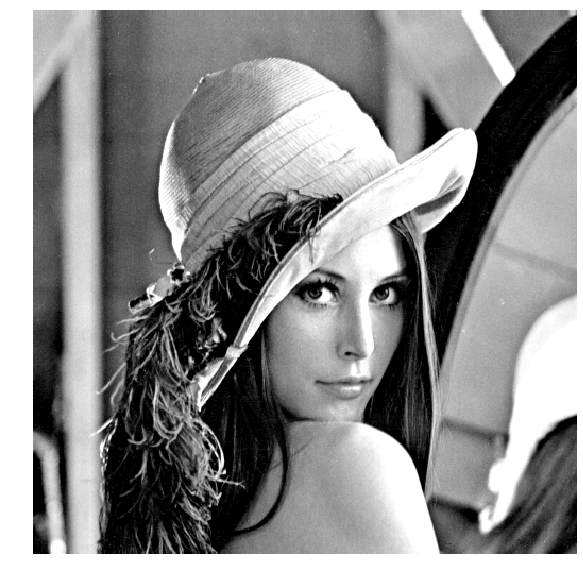

In [53]:
plt.imshow(l, cmap=plt.cm.gray, vmin=30, vmax=200)
 
# Remove axes and ticks
plt.axis('off')

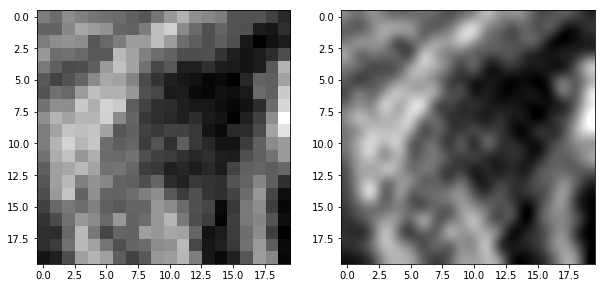

In [54]:
plt.subplot(1,2,1)
plt.imshow(l[200:220, 200:220], cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(l[200:220, 200:220], cmap=plt.cm.gray, interpolation='lanczos')
plt.show()

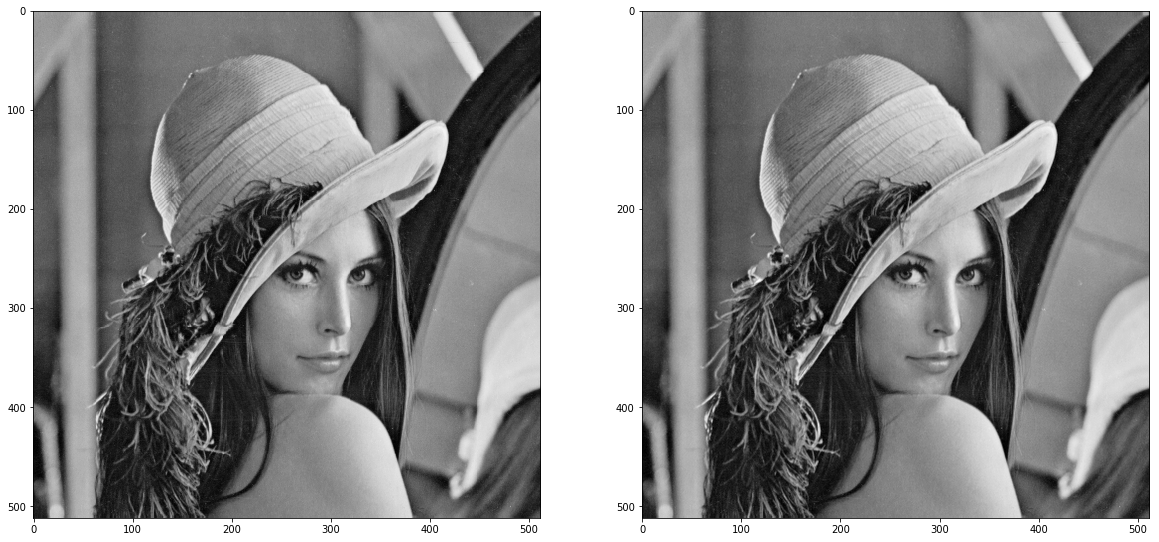

In [55]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(l, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(l, cmap=plt.cm.gray, interpolation='lanczos')
plt.show()

163


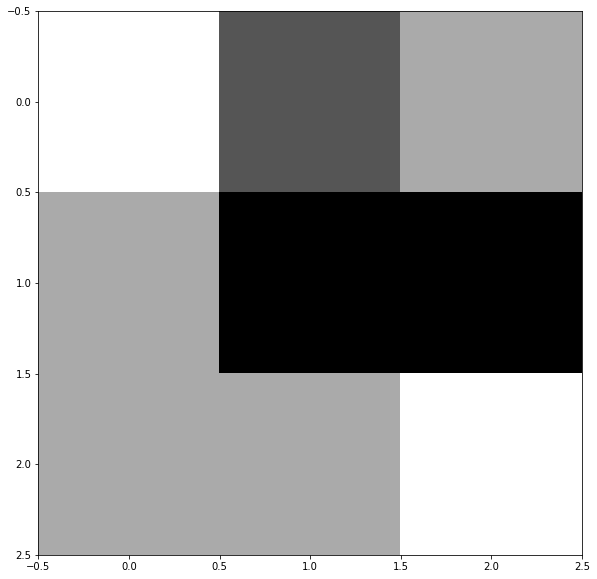

[[154 152 153]
 [153 151 151]
 [153 153 154]]


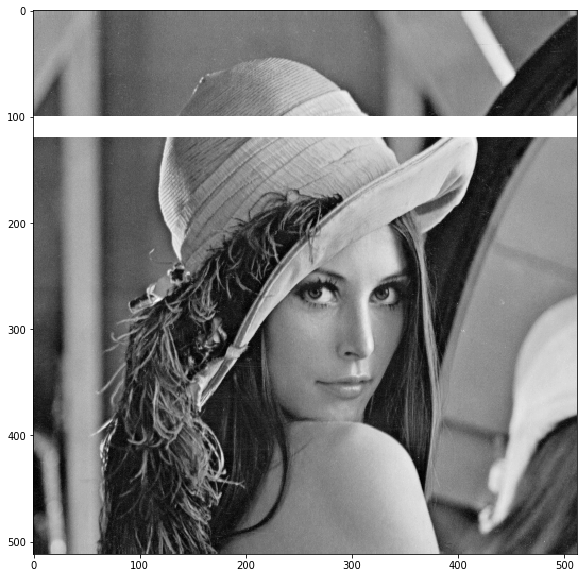

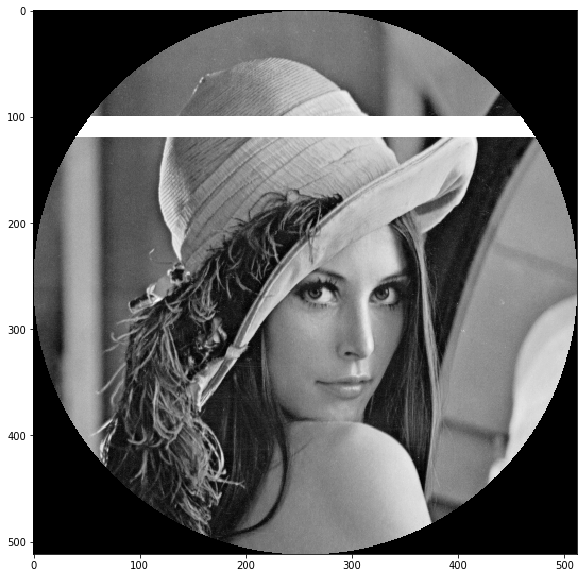

95.62451171875 255 0


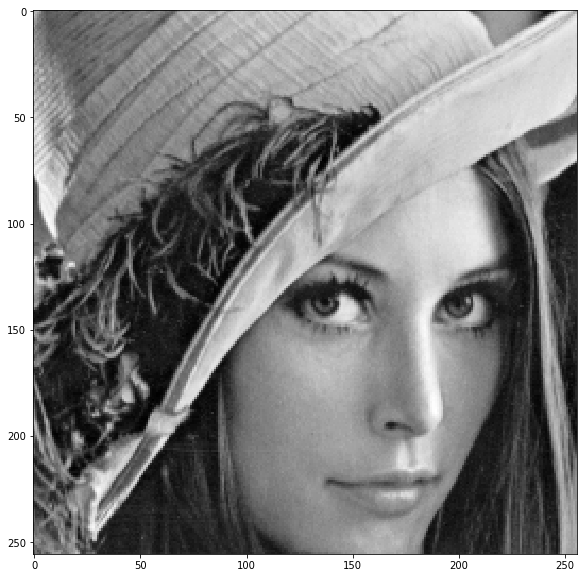

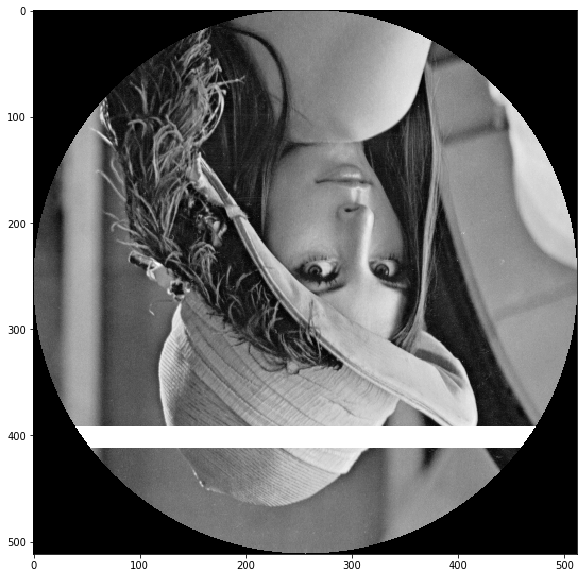

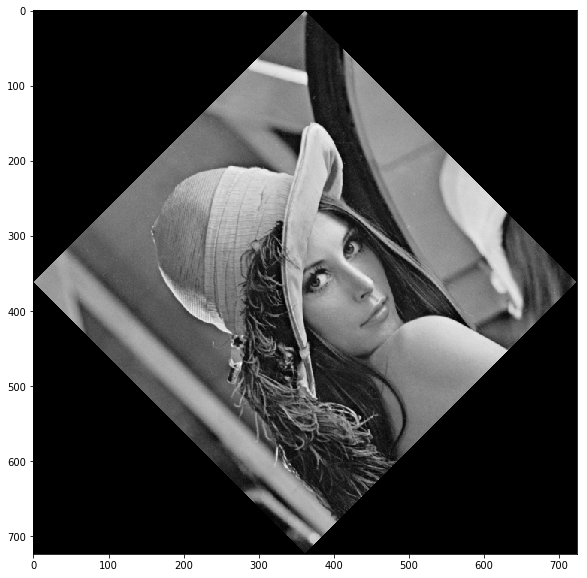

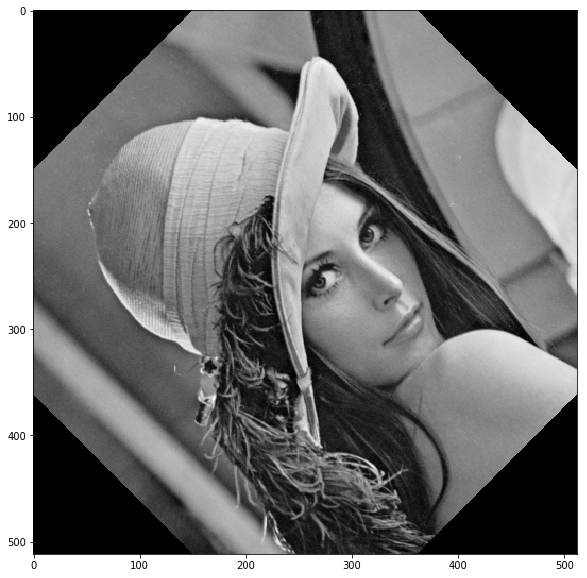

In [64]:
import numpy as np
from scipy import ndimage
lena = l.copy()
# adresowanie pojedynczego piksela
print(lena[0, 40])
# wycinki
plt.imshow(lena[10:13, 20:23], cmap=plt.cm.gray)
plt.show()
print(lena[10:13, 20:23])
 
 
lena[100:120] = 255
 
plt.imshow(lena, cmap=plt.cm.gray)
plt.show()

lx, ly = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# maskowanie
lena[mask] = 0
plt.imshow(lena, cmap=plt.cm.gray)
plt.show()
# średnia wartość jasności w obrazie, maksimum i minimum
print(lena.mean(),
lena.max(),
lena.min())
#przycinanie
crop_lena = lena[lx // 4: - lx // 4, ly // 4: - ly // 4]
plt.imshow(crop_lena, cmap=plt.cm.gray)
plt.show()
# up <-> down flip
flip_ud_lena = np.flipud(lena)
plt.imshow(flip_ud_lena, cmap=plt.cm.gray)
plt.show()
# obroty
rotate_lena = scipy.ndimage.rotate(l.copy(), 45)
plt.imshow(rotate_lena, cmap=plt.cm.gray)
plt.show()
rotate_lena_noreshape = ndimage.rotate(l.copy(), 45, reshape=False)
plt.imshow(rotate_lena_noreshape, cmap=plt.cm.gray)
plt.show()

### SINUS

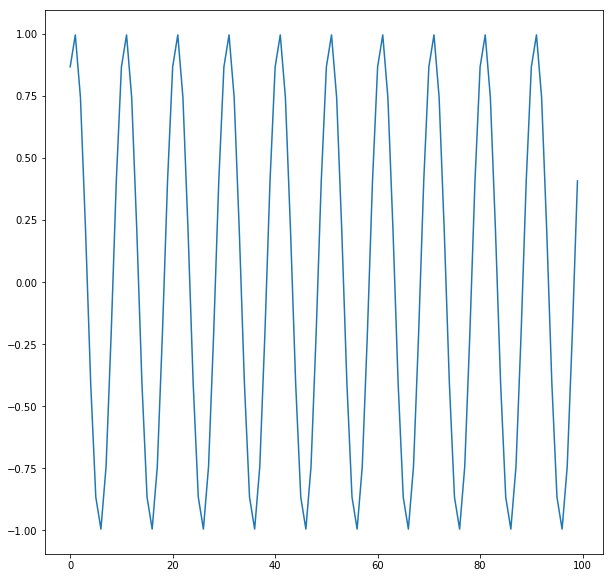

In [69]:
import  matplotlib.pyplot as py 
import numpy as np
py.rcParams['figure.figsize'] = (10.0, 10.0)
 
X = 100 #pikseli 
Fs = 1.0/X #czestosc probkowania co jeden piksel
dx = 1
x = np.arange(0,X,dx)
f = 10.0/X # czestosc sinusa -10 okresów na X 
syg = np.sin(2*np.pi*f*x + np.pi/3);
py.figure(1)
py.plot(x,syg)
py.show()

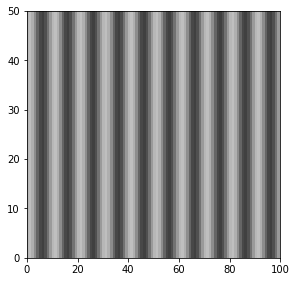

In [72]:
py.figure(2)
# teraz zrobimy z niego obraz 2D 
Y = X//2
SYG = np.zeros((Y,X));
for y in range(Y):
    SYG[y,:]=syg
py.subplot(2,2,1)
py.pcolor(SYG, cmap=py.cm.gray,vmin=-2,vmax = 2) 
py.show()

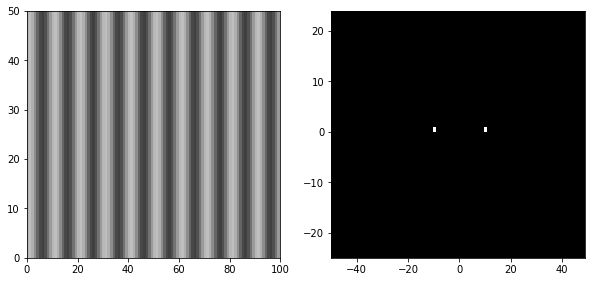

In [73]:
py.subplot(221)
py.pcolor(SYG, cmap=py.cm.gray,vmin=-2,vmax = 2) 
 
py.subplot(222)
SK_X = np.arange(-X/2,X/2,1)
SK_Y = np.arange(-Y/2,Y/2,1)
S = np.fft.fft2(SYG)
modS = np.abs(np.fft.fftshift(S))
py.pcolor(SK_X,SK_Y, modS, cmap=py.cm.gray)

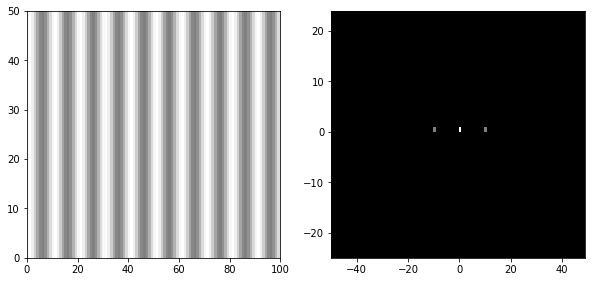

In [74]:
py.subplot(223)
py.pcolor(SYG+1, cmap=py.cm.gray, vmin=-2,vmax = 2)
py.subplot(224)
S = np.fft.fft2(SYG+1)
py.pcolor(SK_X,SK_Y,np.abs(np.fft.fftshift(S)), cmap=py.cm.gray) 
py.show()

In [75]:
A = np.array([[17, 24,  1,  8, 15],[23, 5, 7, 14, 16 ],[4,6,13,20,22],[10,12,19,21,3],[11,18,25,2,9]  ])
h = np.array([[8,1,6],[3,5,7],[4,9,2]])
D = ndimage.correlate(A,h)

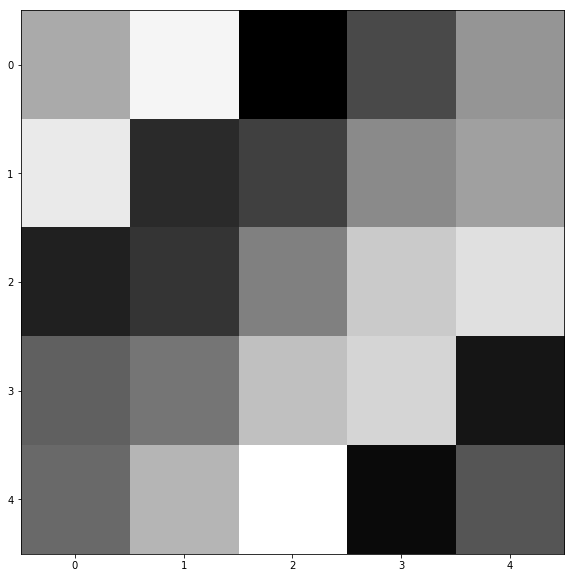

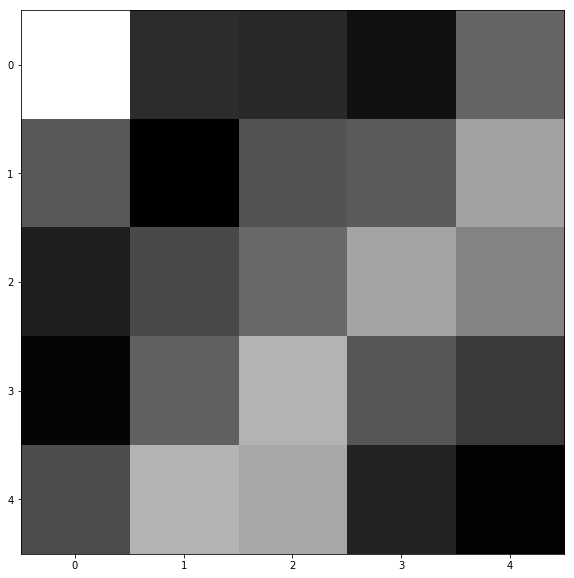

In [78]:
plt.imshow(A, cmap=plt.cm.gray)
plt.show()
# plt.imshow(h, cmap=plt.cm.gray)
# plt.show()
plt.imshow(D, cmap=plt.cm.gray)
plt.show()

### Uśredniający

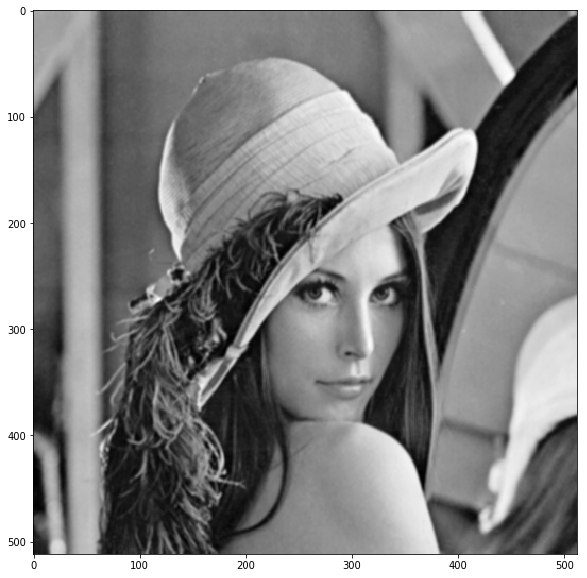

In [80]:
h = np.array([[1./9, 1./9, 1./9],
              [1./9, 1./9, 1./9], 
              [1./9, 1./9, 1./9]])

mean = ndimage.convolve(l,h)

plt.imshow(mean, cmap=plt.cm.gray)
plt.show()

### Wyostrzający

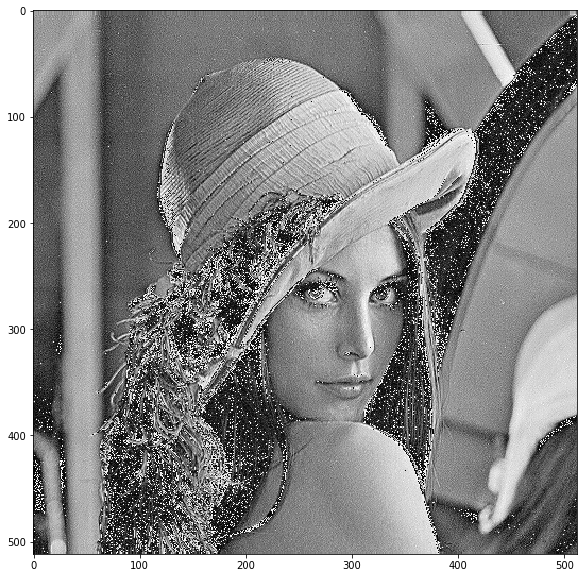

In [81]:
h = np.array([[ 0, -1,  0], 
              [ -1,  5, -1], 
              [  0, -1,  0]])

sharp = ndimage.convolve(l,h)

plt.imshow(sharp, cmap=plt.cm.gray)
plt.show()

### Wypuklający

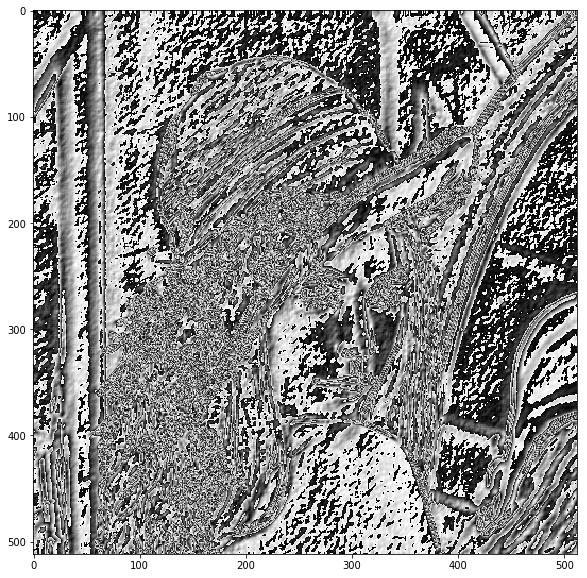

In [82]:
h = np.array([[-1, -1, -1, -1, 0],
              [ -1, -1, -1,  0, 1],
              [ -1, -1,  0,  1, 1],
              [ -1,  0,  1,  1, 1],
              [  0,  1,  1,  1, 1]])

enchance = ndimage.convolve(l,h)

plt.imshow(enchance, cmap=plt.cm.gray)
plt.show()

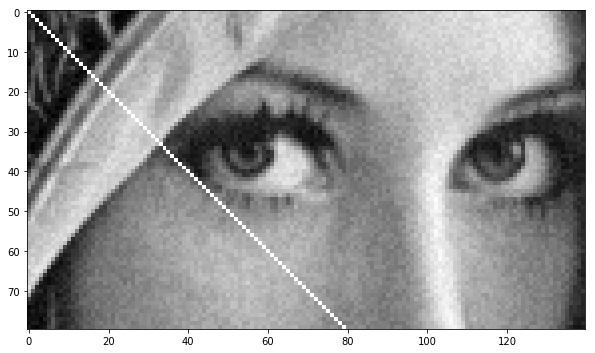

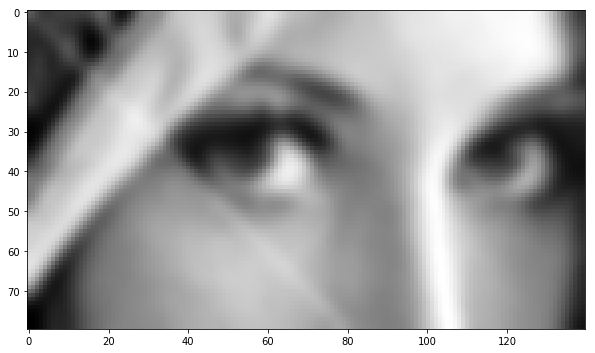

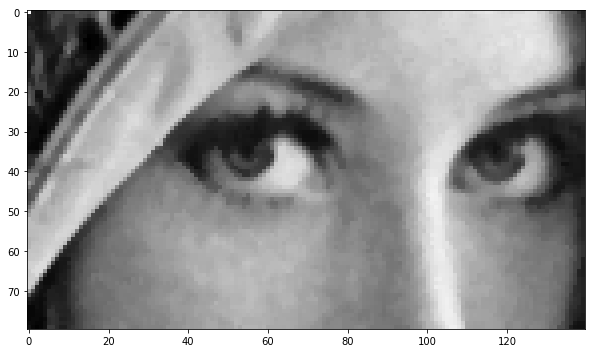

In [85]:
from scipy import misc

l = l[230:310, 210:350]
noisy = l + 0.4 * l.std() * np.random.random(l.shape)
# dodajmy jeszcze "zagniecenie" zdjęcia
noisy[range(80),range(80)]=255

plt.imshow(noisy, cmap=plt.cm.gray)
plt.show()
 
#filtr gaussowski
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

plt.imshow(gauss_denoised, cmap=plt.cm.gray)
plt.show()

#filtr medianowy
med_denoised = ndimage.median_filter(noisy, 3)

plt.imshow(med_denoised, cmap=plt.cm.gray)
plt.show()

In [90]:
l = scipy.misc.imread('lena.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


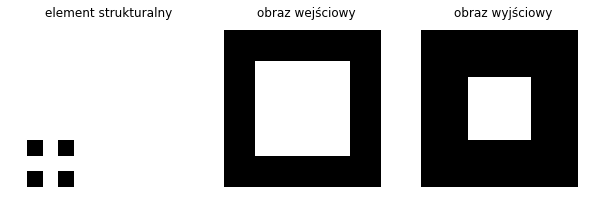

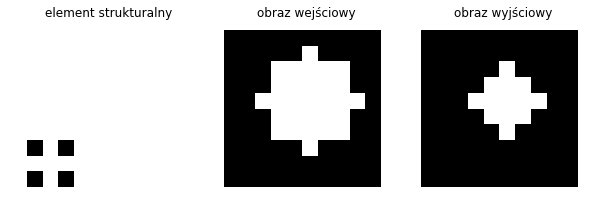

In [95]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
 
def element():
    el = np.array([[0, 1, 0],[1,1,1],[0,1,0]], dtype=bool)
#     el = np.array([[0, 0, 0],[1,1,1],[0,0,0]], dtype=bool)
    return el
def dodaj_kwadrat(ob, x,y, dx,dy):
    '''dodaje kwadrat wypełniony 1 do obrazu binarnego ob. 
    x, y - lewy górny róg
    dx,dy - szerokosć i wysokość '''
    ob[x:x+dx,y:y+dy] = 1
    return ob
def dodaj_kolo(ob, x,y, r):
    '''dodaje koło wypełnione 1 do obrazu binarnego ob. 
    x, y - środek
    r - promień '''
    r2=r**2
    for xi in range(ob.shape[0]):
        for yi in range(ob.shape[1]):
            if (xi-x)**2+(yi-y)**2<=r2:
                ob[xi,yi]=1
    return ob
 
NX=10
NY=10
 
py.figure('erozja 1')
ob = np.zeros((NX,NY))
py.subplot(1,3,1)
el = element()
py.imshow(el,interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title('element strukturalny')
 
py.subplot(1,3,2)
ob = dodaj_kwadrat(ob,2,2,6,6)
py.imshow(ob, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wejściowy')
 
py.subplot(1,3,3)
ob_wyj = ndimage.binary_erosion(ob, structure = el).astype(ob.dtype)
py.imshow(ob_wyj, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wyjściowy')
py.show()
 
py.figure('erozja 2')
ob = np.zeros((NX,NY))
py.subplot(1,3,1)
el = element()
py.imshow(el,interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title('element strukturalny')
 
py.subplot(1,3,2)
#ob = dodaj_kwadrat(ob,2,2,6,6)
ob = dodaj_kolo(ob,5,5,3)
py.imshow(ob, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wejściowy')
 
py.subplot(1,3,3)
ob_wyj = ndimage.binary_erosion(ob, structure = el).astype(ob.dtype)
py.imshow(ob_wyj, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wyjściowy')
py.show()

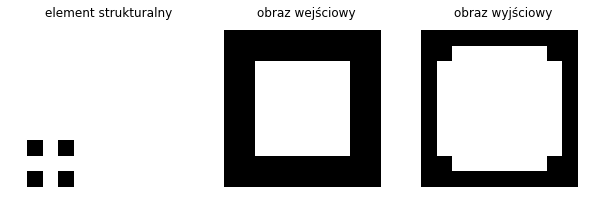

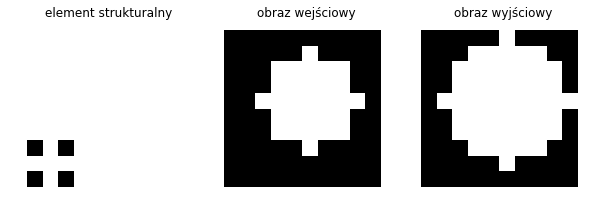

In [97]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
 
def element():
    el = np.array([[0, 1, 0],[1,1,1],[0,1,0]], dtype=bool)
    #el = np.array([[0, 0, 0],[1,1,1],[0,0,0]], dtype=bool)
    return el
def dodaj_kwadrat(ob, x,y, dx,dy):
    '''dodaje kwadrat wypełniony 1 do obrazu binarnego ob. 
    x, y - lewy górny róg
    dx,dy - szerokosć i wysokość '''
    ob[x:x+dx,y:y+dy] = 1
    return ob
def dodaj_kolo(ob, x,y, r):
    '''dodaje koło wypełnione 1 do obrazu binarnego ob. 
    x, y - środek
    r - promień '''
    r2=r**2
    for xi in range(ob.shape[0]):
        for yi in range(ob.shape[1]):
            if (xi-x)**2+(yi-y)**2<=r2:
                ob[xi,yi]=1
    return ob
 
NX=10
NY=10
 
py.figure('erozja 1')
ob = np.zeros((NX,NY))
py.subplot(1,3,1)
el = element()
py.imshow(el,interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title('element strukturalny')
 
py.subplot(1,3,2)
ob = dodaj_kwadrat(ob,2,2,6,6)
py.imshow(ob, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wejściowy')
 
py.subplot(1,3,3)
ob_wyj = ndimage.binary_dilation(ob, structure = el).astype(ob.dtype)
py.imshow(ob_wyj, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wyjściowy')
py.show()
 
py.figure('erozja 2')
ob = np.zeros((NX,NY))
py.subplot(1,3,1)
el = element()
py.imshow(el,interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title('element strukturalny')
 
py.subplot(1,3,2)
#ob = dodaj_kwadrat(ob,2,2,6,6)
ob = dodaj_kolo(ob,5,5,3)
py.imshow(ob, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wejściowy')
 
py.subplot(1,3,3)
ob_wyj = ndimage.binary_dilation(ob, structure = el).astype(ob.dtype)
py.imshow(ob_wyj, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wyjściowy')
py.show()

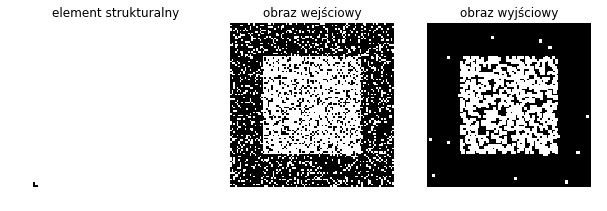

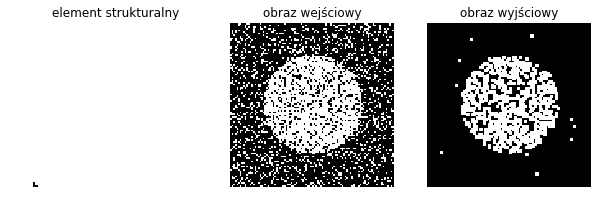

In [104]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
 
def element():
#     el = np.array([[0, 1, 0],[1,1,1],[0,1,0]], dtype=bool)
    el = np.zeros((3,3))
    el = dodaj_kolo(el,1.5,1.5,1.5)
    return el
def dodaj_kwadrat(ob, x,y, dx,dy):
    '''dodaje kwadrat wypełniony 1 do obrazu binarnego ob. 
    x, y - lewy górny róg
    dx,dy - szerokosć i wysokość '''
    ob[x:x+dx,y:y+dy] = 1
    return ob
def dodaj_kolo(ob, x,y, r):
    '''dodaje koło wypełnione 1 do obrazu binarnego ob. 
    x, y - środek
    r - promień '''
    r2=r**2
    for xi in range(ob.shape[0]):
        for yi in range(ob.shape[1]):
            if (xi-x)**2+(yi-y)**2<=r2:
                ob[xi,yi]=1
    return ob
def dodaj_szum(ob,ile):
    tmp = np.random.rand(ob.shape[0],ob.shape[1])
    idx = np.where(tmp<ile)
    ob[idx] = np.abs(ob[idx]-1)
    return ob
 
 
py.close('all')
NX=100
NY=100
 
 
 
#spróbujmy progowania na różnym poziomie
py.figure('erozja 1')
ob = np.zeros((NX,NY))
py.subplot(1,3,1)
el = element()
py.imshow(el,interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title('element strukturalny')
 
py.subplot(1,3,2)
ob = dodaj_kwadrat(ob,20,20,60,60)
ob = dodaj_szum(ob,0.2)
py.imshow(ob, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wejściowy')
 
py.subplot(1,3,3)
ob_wyj = ndimage.binary_opening(ob, structure = el).astype(ob.dtype)
py.imshow(ob_wyj, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wyjściowy')
py.show()
 
py.figure('erozja 2')
ob = np.zeros((NX,NY))
py.subplot(1,3,1)
el = element()
py.imshow(el,interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title('element strukturalny')
 
py.subplot(1,3,2)
#ob = dodaj_kwadrat(ob,2,2,6,6)
ob = dodaj_kolo(ob,50,50,30)
ob = dodaj_szum(ob,0.2)
py.imshow(ob, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wejściowy')
 
py.subplot(1,3,3)
ob_wyj = ndimage.binary_opening(ob, structure = el).astype(ob.dtype)
py.imshow(ob_wyj, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wyjściowy')
py.show()

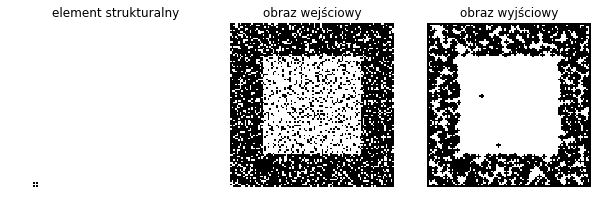

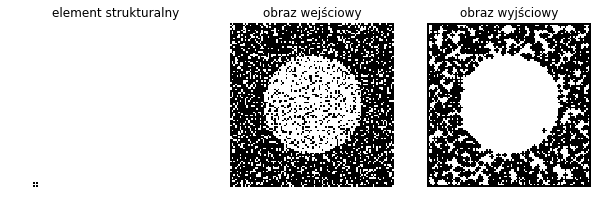

In [106]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
 
def element():
    el = np.array([[0, 1, 0],[1,1,1],[0,1,0]], dtype=bool)
#     el = np.zeros((3,3))
#     el = dodaj_kolo(el,1.5,1.5,1.5)
    return el
def dodaj_kwadrat(ob, x,y, dx,dy):
    '''dodaje kwadrat wypełniony 1 do obrazu binarnego ob. 
    x, y - lewy górny róg
    dx,dy - szerokosć i wysokość '''
    ob[x:x+dx,y:y+dy] = 1
    return ob
def dodaj_kolo(ob, x,y, r):
    '''dodaje koło wypełnione 1 do obrazu binarnego ob. 
    x, y - środek
    r - promień '''
    r2=r**2
    for xi in range(ob.shape[0]):
        for yi in range(ob.shape[1]):
            if (xi-x)**2+(yi-y)**2<=r2:
                ob[xi,yi]=1
    return ob
def dodaj_szum(ob,ile):
    tmp = np.random.rand(ob.shape[0],ob.shape[1])
    idx = np.where(tmp<ile)
    ob[idx] = np.abs(ob[idx]-1)
    return ob
 
 
py.close('all')
NX=100
NY=100
 
 
 
#spróbujmy progowania na różnym poziomie
py.figure('erozja 1')
ob = np.zeros((NX,NY))
py.subplot(1,3,1)
el = element()
py.imshow(el,interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title('element strukturalny')
 
py.subplot(1,3,2)
ob = dodaj_kwadrat(ob,20,20,60,60)
ob = dodaj_szum(ob,0.2)
py.imshow(ob, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wejściowy')
 
py.subplot(1,3,3)
ob_wyj = ndimage.binary_closing(ob, structure = el).astype(ob.dtype)
py.imshow(ob_wyj, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wyjściowy')
py.show()
 
py.figure('erozja 2')
ob = np.zeros((NX,NY))
py.subplot(1,3,1)
el = element()
py.imshow(el,interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title('element strukturalny')
 
py.subplot(1,3,2)
#ob = dodaj_kwadrat(ob,2,2,6,6)
ob = dodaj_kolo(ob,50,50,30)
ob = dodaj_szum(ob,0.2)
py.imshow(ob, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wejściowy')
 
py.subplot(1,3,3)
ob_wyj = ndimage.binary_closing(ob, structure = el).astype(ob.dtype)
py.imshow(ob_wyj, interpolation = 'nearest',cmap=py.cm.gray)
py.xlim([-0.5,NX])
py.ylim([-0.5,NY])
py.axis('off')
py.title(u'obraz wyjściowy')
py.show()

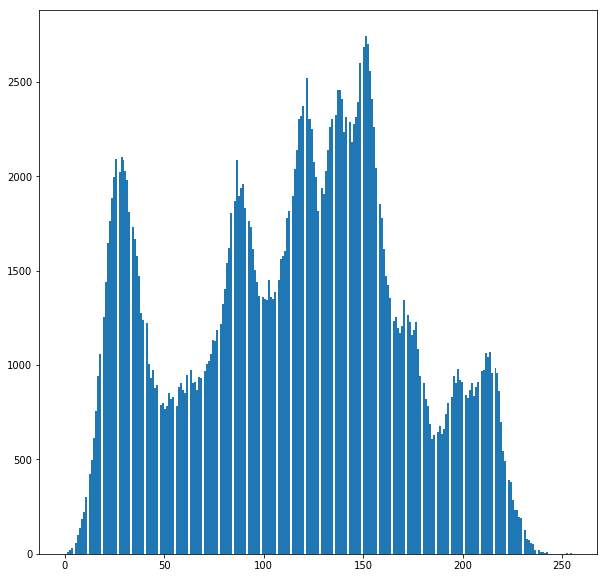

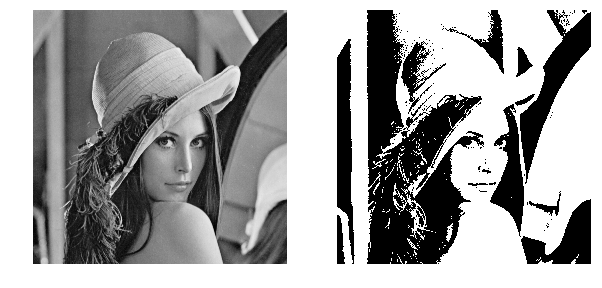

In [111]:


# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
 
def proguj(ob, prog):
    ob_wyj = np.zeros(ob.shape)
    ob_wyj[np.where(ob>prog)]=1
    return ob_wyj
py.close('all')
 
 
py.figure('histogram szarosci')
py.hist(l.ravel(),255) # narysujmy histogram odcieni
py.show()
#spróbujmy progowania na różnym poziomie
py.figure('progowanie')
py.subplot(1,2,1)
py.imshow(l,interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.subplot(1,2,2)
prog = 110
l_prog = proguj(l,prog)
py.imshow(l_prog, interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.show()

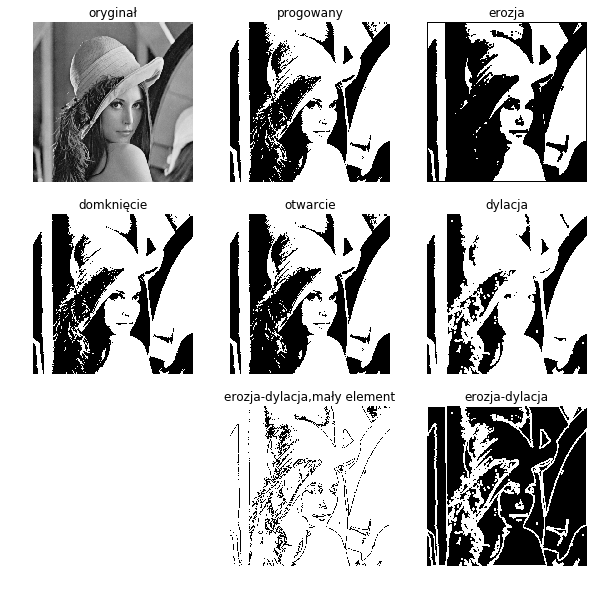

In [113]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
 
def proguj(ob, prog):
    ob_wyj = np.zeros(ob.shape)
    ob_wyj[np.where(ob>prog)]=1
    return ob_wyj
def element():
    #el = np.array([[0, 1, 0],[1,1,1],[0,1,0]], dtype=bool)
    el = np.zeros((6,6))
    el = dodaj_kolo(el,3,3,3)
    return el
def dodaj_kwadrat(ob, x,y, dx,dy):
    '''dodaje kwadrat wypełniony 1 do obrazu binarnego ob. 
    x, y - lewy górny róg
    dx,dy - szerokosć i wysokość '''
    ob[x:x+dx,y:y+dy] = 1
    return ob
def dodaj_kolo(ob, x,y, r):
    '''dodaje koło wypełnione 1 do obrazu binarnego ob. 
    x, y - środek
    r - promień '''
    r2=r**2
    for xi in range(ob.shape[0]):
        for yi in range(ob.shape[1]):
            if (xi-x)**2+(yi-y)**2<=r2:
                ob[xi,yi]=1
    return ob    
 
 
py.close('all')

py.figure('operacje')
py.subplot(3,3,1)
py.imshow(l,interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.title(u'oryginał')
 
py.subplot(3,3,2)
prog = 110
l_prog = proguj(l,prog)
py.imshow(l_prog, interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.title('progowany')
 
py.subplot(3,3,3)
el=element()
l_wyj1 = ndimage.binary_erosion(l_prog, structure = el).astype(l_prog.dtype)
py.imshow(l_wyj1, interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.title('erozja')
 
py.subplot(3,3,6)
el=element()
l_wyj2 = ndimage.binary_dilation(l_prog, structure = el).astype(l_prog.dtype)
py.imshow(l_wyj2, interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.title('dylacja')
 
py.subplot(3,3,9)
l_wyj3 = l_wyj2-l_wyj1
py.imshow(l_wyj3, interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.title('erozja-dylacja')
 
py.subplot(3,3,8)
el = np.array([[0, 1, 0],[1,1,1],[0,1,0]], dtype=bool)
l_wyj3 = ndimage.binary_erosion(l_prog, structure = el).astype(l_prog.dtype)-ndimage.binary_dilation(l_prog, structure = el).astype(l_prog.dtype)
py.imshow(l_wyj3, interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.title(u'erozja-dylacja,mały element')
 
py.subplot(3,3,4)
l_wyj4 = ndimage.binary_closing(l_prog, structure = el).astype(l_prog.dtype)
py.imshow(l_wyj4, interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.title(u'domknięcie')
 
py.subplot(3,3,5)
l_wyj5 = ndimage.binary_opening(l_prog, structure = el).astype(l_prog.dtype)
py.imshow(l_wyj5, interpolation = 'nearest',cmap=py.cm.gray)
py.axis('off')
py.title(u'otwarcie')
 
 
 
py.show()

### SEGMENTACJA

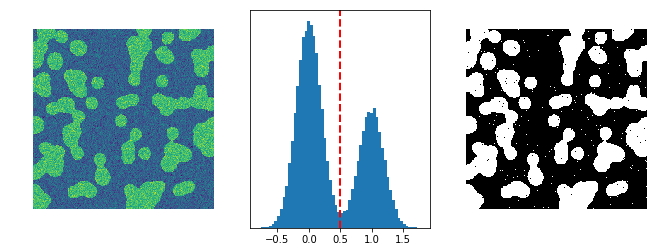

In [116]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
 
np.random.seed(1)
n = 10
l = 256
# generujemy pusty obrazek
im = np.zeros((l, l))
 
# w losowych miejscach dorzucamy n punktów
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
 
#rozmywamy punkty filtrem gaussowskim
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
 
#progujemy maskę na połowie wartości średniej obrazka
mask = (im > im.mean()).astype(np.float)
 
# wytwarzamy obrazek złożony z zaszumionej maski
img = mask + 0.2*np.random.randn(*mask.shape)
 
#progujemy zszumiony obrazek
binary_img = img > 0.5
 
 
hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
 
py.figure(figsize=(11,4))
 
py.subplot(131)
py.imshow(img)
py.axis('off')
py.subplot(132)
#py.plot(bin_centers, hist, lw=2)
py.hist(img.ravel(),60)
py.axvline(0.5, color='r', ls='--', lw=2)
py.yticks([])
py.subplot(133)
py.imshow(binary_img, cmap=py.cm.gray, interpolation='nearest')
py.axis('off')
py.show()

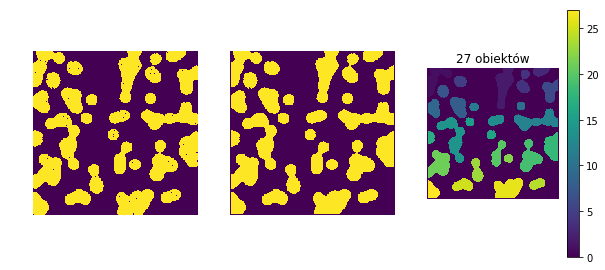

In [117]:
# odszumiamy
# usuwamy białe kropki
open_img = ndimage.binary_opening(binary_img)
py.subplot(234)
py.imshow(open_img)
py.axis('off')
# usuwamy małe czarne dziury
close_img = ndimage.binary_closing(open_img)
py.subplot(235)
py.imshow(close_img)
py.axis('off')
# segmentujemy:
img_labeled,N_objects = ndimage.label(close_img)
py.subplot(236)
py.imshow(img_labeled.astype(np.float),interpolation='nearest')
py.colorbar()
py.axis('off')
py.title(str(N_objects)+u' obiektów')
py.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


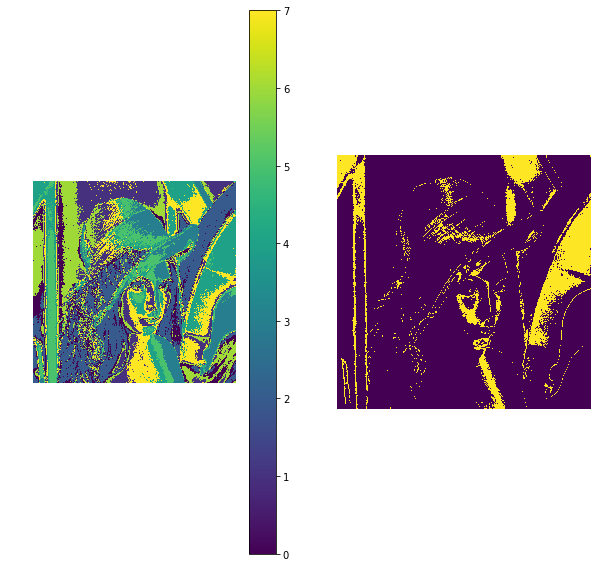

In [123]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
#segmentacja przez analizę skupień
l = scipy.misc.imread('lena.png')

from scipy.cluster.vq import kmeans,vq
K_opt = 8
centroids,_ = kmeans(l.ravel()*1.,K_opt)
 
# przypisujemy klasę
idx,_ = vq(l.ravel(),centroids)
idx.shape = l.shape
py.figure(2)
py.subplot(1,2,1)
py.imshow(idx)#, cmap=py.cm.gray)
py.colorbar()
py.axis('off')
py.subplot(1,2,2)
tmp_obj = np.zeros((l.shape[0],l.shape[1]))
tmp_obj[np.where(idx==4)] = 1
py.imshow(tmp_obj)#, cmap=py.cm.gray)
py.axis('off')
py.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


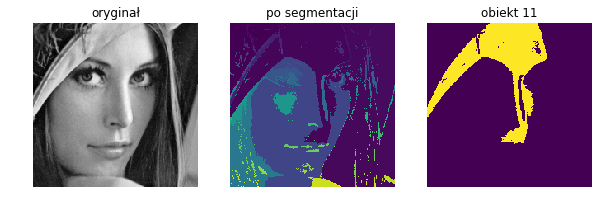

In [128]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as py
from scipy import ndimage
from scipy import misc
import sys
#segmentacja przez rozrost
 
 
def testuj(reg_id, x,y, do_sprawdzenia, prog = 10): 
    global im_org, im_marked, reg_wsp, reg_wart  
    while len(do_sprawdzenia)>0:
        tmp_x,tmp_y = do_sprawdzenia.pop(0)
        #print 'testuje: ', tmp_x,tmp_y 
        if tmp_x>=0 and tmp_y>=0 and tmp_x<im_org.shape[0] and tmp_y<im_org.shape[1]: # jeśli punkt wewnątrz obrazu
            if im_marked[tmp_x,tmp_y]==-1: # jeśli punkt nie należy do żadnego regionu
                if im_marked[tmp_x,tmp_y] != reg_id: #jeśli punkt nie należy do aktualnego regionu
                    if np.abs(im_org[tmp_x,tmp_y]-np.mean(reg_wart[reg_id])) < prog: #jeśli punkt ma wartość bliższą do średniej z obszaru niż próg
                        #to dodajemy punkt do listy bieżącego regionu, odhaczamy go na mapie regionów i dodajemy jego sąsiadów do listy, którą trzeba sprawdzić
                        reg_wsp[reg_id].append((tmp_x,tmp_y))
                        reg_wart[reg_id].append(im_org[tmp_x,tmp_y])
                        im_marked[tmp_x,tmp_y]=reg_id
                        do_sprawdzenia.append((tmp_x-1,tmp_y))
                        do_sprawdzenia.append((tmp_x  ,tmp_y+1))
                        do_sprawdzenia.append((tmp_x,  tmp_y-1))
                        do_sprawdzenia.append((tmp_x+1,tmp_y))
 
 
    return do_sprawdzenia
 
# wczytujemy lenę i wybieramy fragment z twarzą
l = scipy.misc.imread('lena.png')
l = np.copy(l[200:400,200:400])
 
global im_org, im_marked, reg_wsp, reg_wart
im_marked = -1*np.ones((l.shape[0],l.shape[1]),dtype='int')
im_org = l
# próg na odchylenie dołączanego punktu od średniej
prog = 35
 
reg_wsp = []
reg_wart =[]
reg_id = 0
 
 
while np.sum(im_marked==-1)>0:
    # współrzędne punktu startowego bierzemy jako pierwsze z brzegu nie przypisane jeszcze do żadnego regionu
    x=np.where(im_marked==-1)[0][0] 
    y=np.where(im_marked==-1)[1][0] 
    # dodajemy miejsce na listę przechowującą współrzedne punktów należących do regionów i na ich wartości
    reg_wsp.append([])
    reg_wsp[reg_id].append((x,y))
    reg_wart.append([])
    reg_wart[reg_id].append(im_org[x,y])
    # odchaczamy na mapie regionów bieżący punkt jako przypisany do reg_id
    im_marked[x,y] = reg_id
    # inicjujemy listę punktów, które trzeba sprawdzić, czy nie należą do bieżącego regionu 
    do_sprawdzenia = [(x-1,y),(x,y+1),(x,y-1),(x+1,y)]
    do_sprawdzenia = testuj(reg_id,x,y,do_sprawdzenia,prog)
    print(reg_id, end='\r', flush=True)
    reg_id +=1
 
# rysowanie wyników    
py.figure(2)
py.subplot(1,3,1)
py.imshow(l, interpolation='nearest', cmap=py.cm.gray)
py.axis('off')
py.title(u'oryginał')
py.subplot(1,3,2)
py.imshow(im_marked, interpolation='nearest')#, cmap=py.cm.gray)
py.axis('off')
py.title('po segmentacji')
py.subplot(1,3,3)
S = np.array([ len(reg_wart[i]) for i in range(len(reg_wart))])
id = np.where((S>5000))[0][0]
py.imshow(im_marked==id, interpolation='nearest')#, cmap=py.cm.gray)
py.axis('off')
py.title('obiekt '+str(id))
py.show()